In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## New

### 1. rollout/return

In [42]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#-----------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[3]
csv_dir = "../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/"+itv+"/"
modes = ["SARA","PLA","Random"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(csv_dir+"run_"+ mode +"*.csv")
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/point75\run_SARA_1569082116gra1117_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/point75\run_SARA_1569082116gra1125_file.csv
PLA: 2 files found
../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/point75\run_PLA_1569084964gra118_file.csv
../SHARCNET/Results/Tensorboard_to_CSV/debug/ddpg/300_300_NN/point75\run_PLA_1569084966gra109_file.csv
Random: 0 files found


In [43]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file))
        
    # Random has no Q_mean records
    if mode == "Random":
        metrics = ["rollout/return"]
    else:
        metrics = ["rollout/return", "rollout/Q_mean"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[metric+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[metric+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[metric+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [44]:
all_combined_data['SARA']

,rollout/return_run0,rollout/return_run1,rollout/return_avg,rollout/return_std,rollout/Q_mean_run0,rollout/Q_mean_run1,rollout/Q_mean_avg,rollout/Q_mean_std
0,16.772465,10.607131,13.689798,3.082667,0.020665,-0.011293,0.004686,0.015979
1,25.859276,21.783579,23.821427,2.037848,0.371449,0.265126,0.318288,0.053162
2,25.892689,25.859066,25.875877,0.016811,0.613213,0.447928,0.530570,0.082643
3,25.859423,25.892424,25.875923,0.016500,0.705045,0.589828,0.647436,0.057608
4,25.892704,25.859150,25.875927,0.016777,0.792538,0.686740,0.739639,0.052899
5,25.859423,25.892433,25.875928,0.016505,0.871501,0.767402,0.819451,0.052050
6,25.892704,25.859152,25.875928,0.016776,0.926833,0.846956,0.886895,0.039939
7,25.859423,25.892433,25.875928,0.016505,0.981908,0.917254,0.949581,0.032327
8,25.892704,25.859152,25.875928,0.016776,1.029601,0.980121,1.004861,0.024740
9,25.859423,25.892433,25.875928,0.016505,1.070333,1.038644,1.054489,0.015845


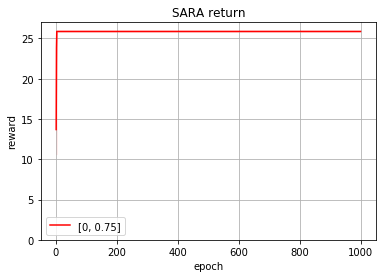

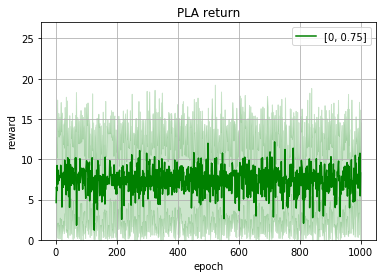

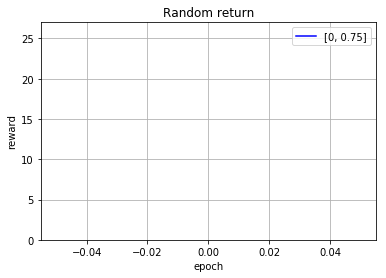

In [45]:
# Plot return
colors = ['r','g','b']
metric = "rollout/return"
me = metric.split('/')[1]
modes = ["SARA","PLA","Random"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig('./plots_for_thesis/debug/{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')


### 2.rollout/Q_mean

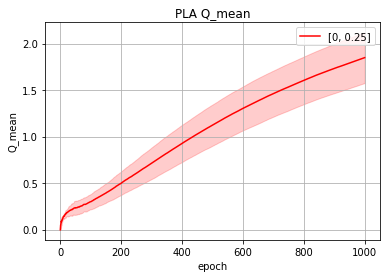

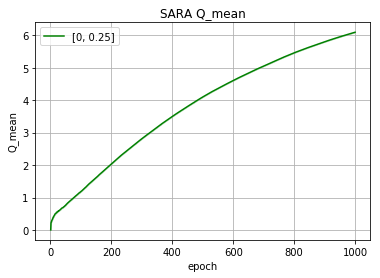

In [37]:
colors = ['r','g','b']
metric = "rollout/Q_mean"
modes = ["PLA","SARA"]
me = metric.split('/')[1]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,me))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig('./plots_for_thesis/debug/{}_{}_{}.png'.format(itv,mode,me), bbox_inches='tight')
    